In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#import supervised learning algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv('Dataset_spine.csv')



  #encoding

In [4]:
lower_pain_data = data[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Class_att']]
lbl=lower_pain_data

new_data= data[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Class_att']]

#visualizations for data and probabilistic distributions 

data['Class_att'].describe()
data[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']]


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320


In [5]:
data.Class_att = [1 if each == "Abnormal" else 0 for each in data.Class_att]

In [6]:
#label_encoding_features=['Class_att']
#for column in label_encoding_features:
#    values = array(new_data[column].values)
#    label_encoder = LabelEncoder()
 #   integer_encoded = label_encoder.fit_transform(values) 
  #  lower_pain_data[column]=integer_encoded;

In [7]:
#isbalance=lower_pain_data['Class_att']

In [8]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200,1.000000


In [9]:

#sifir=0
#bir=0
#i=0
#z=0
#print(isbalance)


#while (i<len(isbalance)):
 #   for(isbalance(i)==0):
  #      sifir+=1
   #     i+=1
    #else:
     #   bir+=1
      #  i+=1
    


#print(sifir)
#print(bir)

In [10]:
#PCA Kullanımı

In [11]:

#from sklearn.decomposition import PCA
#X = data
#pca = PCA(n_components=2)
#pca.fit(X)

In [12]:
classdegerlendirme=data[['Class_att']]
classdegerlendirme.describe()

,Class_att
count,310.000000
mean,0.677419
std,0.468220
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [13]:
lower_pain_data=data[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Class_att']]

In [14]:
columns=lower_pain_data.columns
for column in columns:
    print(column)

pelvic_incidence
pelvic_tilt
lumbar_lordosis_angle
sacral_slope
pelvic_radius
degree_spondylolisthesis
pelvic_slope
direct_tilt
thoracic_slope
cervical_tilt
sacrum_angle
scoliosis_slope
Class_att


In [15]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [13]:
#NORMALİZASYON

In [16]:
y = data.Class_att.values

new_data = data.drop(["Class_att"],axis=1)

 
x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)

In [18]:
toplam_data=lower_pain_data['pelvic_tilt']
liste=list(toplam_data)

print(len(liste))    

310


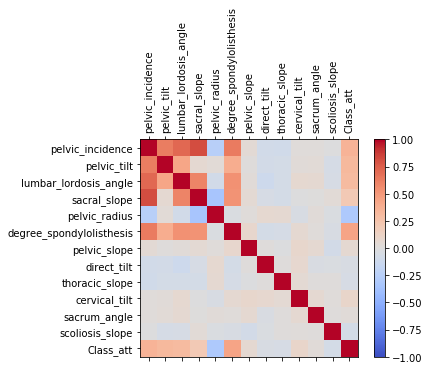

In [19]:
corr = lower_pain_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(lower_pain_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(lower_pain_data.columns)
ax.set_yticklabels(lower_pain_data.columns)
plt.show()

In [15]:
#X_train, X_test, Y_train, Y_test = train_test_split(lower_pain_data.iloc[:,:11].values, lower_pain_data.iloc[:,[12]].values, test_size=0.25)

In [20]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

232
232
78
78


In [21]:
sm=SMOTE()
X_train, Y_train = sm.fit_resample(X_train, Y_train.ravel())

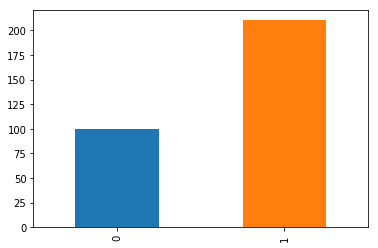

In [22]:
data["Class_att"].value_counts().sort_index().plot.bar()

In [69]:
#en iyi smote'yi bulucu


In [23]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))



330
330
78
78


In [24]:
toplayici=0
a=0
b=1
for a in data['Class_att']==0:
    toplayici+=1
print(toplayici)


toplayici=0
for b in data['Class_att']==1:
    toplayici+=1
print(toplayici)

310
310


In [25]:
def plot_conf_matrix(c_matrix,whichData):
    plt.clf()
    plt.imshow(c_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('NORMAL OR ABNORMAL-'+ whichData)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(c_matrix[i][j]))
    plt.show()

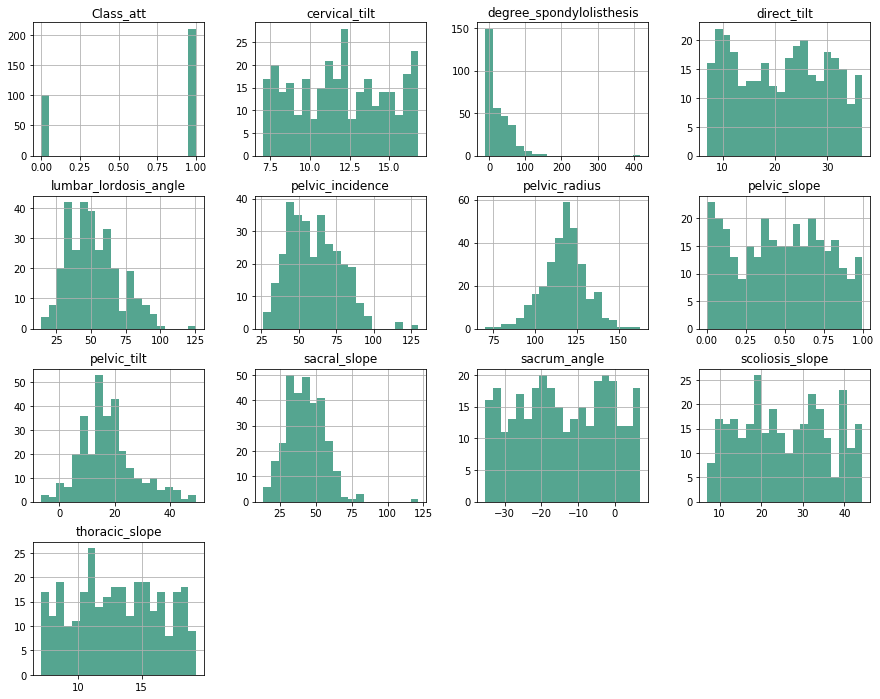

In [22]:
data.hist(figsize=(15,12),bins = 20, color="#007959AA")
plt.title("Features Distribution")
plt.show()

lojistik regresyon
Accuracy on training data: 0.888
Accuracy on testing data: 0.859


c:\users\real\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


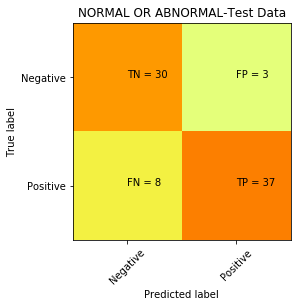

In [27]:
logreg = LogisticRegression(penalty='l1',C=3.5055566091841532).fit(X_train, Y_train)

print("lojistik regresyon")
print("Accuracy on training data: {:.3f}".format(logreg.score(X_train, Y_train)))
print("Accuracy on testing data: {:.3f}".format(logreg.score(X_test, Y_test)))

#call function for visulize confusion matrix 
y_predicted = logreg.predict(X_test)
cm = confusion_matrix(Y_test, y_predicted)
plot_conf_matrix(cm,'Test Data')

Accuracy Score for Train Set:

0.8878787878787879


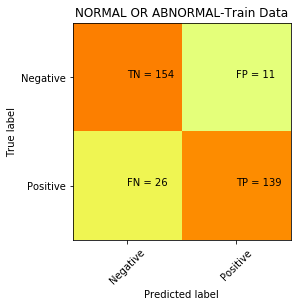

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       165
           1       0.93      0.84      0.88       165

   micro avg       0.89      0.89      0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330

Accuracy Score for Test Set:

0.8589743589743589


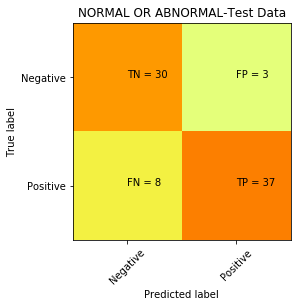

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.93      0.82      0.87        45

   micro avg       0.86      0.86      0.86        78
   macro avg       0.86      0.87      0.86        78
weighted avg       0.87      0.86      0.86        78



In [28]:
predictions = logreg.predict(X_train)
print("Accuracy Score for Train Set:\n")
print(accuracy_score(Y_train, predictions))
plot_conf_matrix(confusion_matrix(Y_train, predictions),'Train Data')
print(classification_report(Y_train, predictions))

predictions = logreg.predict(X_test)
print("Accuracy Score for Test Set:\n")
print(accuracy_score(Y_test, predictions))
plot_conf_matrix(confusion_matrix(Y_test, predictions),'Test Data')
print(classification_report(Y_test, predictions))

svm
Accuracy on training data: 0.824
Accuracy on testing data: 0.782


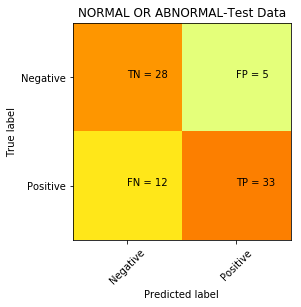

In [30]:
#SVM

from sklearn import svm

SVM0 = svm.SVC(gamma='scale')
SVM0.fit(X_train, Y_train)  
SVC()

print("svm")
print("Accuracy on training data: {:.3f}".format(SVM0.score(X_train, Y_train)))
print("Accuracy on testing data: {:.3f}".format(SVM0.score(X_test, Y_test)))

#call function for visulize confusion matrix 
y_predicted = SVM0.predict(X_test)
cm = confusion_matrix(Y_test, y_predicted)
plot_conf_matrix(cm,'Test Data')

Accuracy Score for Train Set:

0.8242424242424242


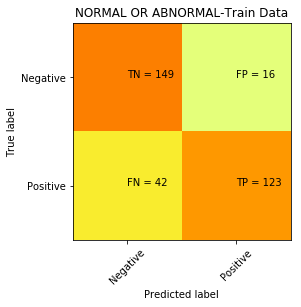

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       165
           1       0.88      0.75      0.81       165

   micro avg       0.82      0.82      0.82       330
   macro avg       0.83      0.82      0.82       330
weighted avg       0.83      0.82      0.82       330

Accuracy Score for Test Set:

0.782051282051282


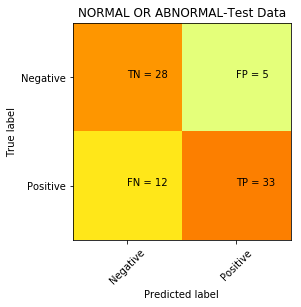

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        33
           1       0.87      0.73      0.80        45

   micro avg       0.78      0.78      0.78        78
   macro avg       0.78      0.79      0.78        78
weighted avg       0.80      0.78      0.78        78



In [31]:
predictions = SVM0.predict(X_train)
print("Accuracy Score for Train Set:\n")
print(accuracy_score(Y_train, predictions))
plot_conf_matrix(confusion_matrix(Y_train, predictions),'Train Data')
print(classification_report(Y_train, predictions))

predictions = SVM0.predict(X_test)
print("Accuracy Score for Test Set:\n")
print(accuracy_score(Y_test, predictions))
plot_conf_matrix(confusion_matrix(Y_test, predictions),'Test Data')
print(classification_report(Y_test, predictions))

Decision Tree
Accuracy on training data: 0.939
Accuracy on testing data: 0.808


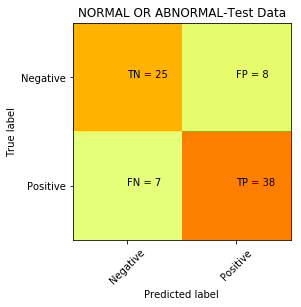

In [32]:
decisiontree_training_accuracy = []
decisiontree_test_accuracy = []
max_depth_values = []


tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best')
tree.fit(X_train, Y_train.ravel())
decisiontree_training_accuracy.append(tree.score(X_train, Y_train))
decisiontree_test_accuracy.append(tree.score(X_test, Y_test))
   # max_depth_values.append(i)

print("Decision Tree")
#print ('Optimal max_depth value for testing data: {}'.format(max_depth_values[decisiontree_test_accuracy.index(max(decisiontree_test_accuracy))]))
print("Accuracy on training data: {:.3f}".format(max(decisiontree_training_accuracy)))
print("Accuracy on testing data: {:.3f}".format(max(decisiontree_test_accuracy)))

#call function for visulize confusion matrix
y_predicted = tree.predict(X_test)
cm = confusion_matrix(Y_test, y_predicted)
plot_conf_matrix(cm,'Test Data')

#plot accuracy changing acording to max depth values
#plt.figure()
#plt.title('Decision Tree Classifier Accuracy-max_depth_values')
#plt.plot(max_depth_values, decisiontree_training_accuracy, label="training accuracy")
#plt.plot(max_depth_values, decisiontree_test_accuracy, label="test accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("max_depth")
#plt.legend()

Accuracy Score for Train Set:

0.9393939393939394


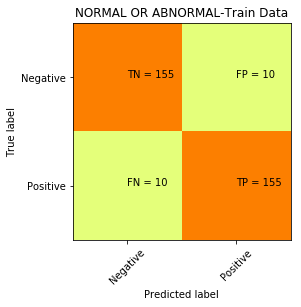

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       165
           1       0.94      0.94      0.94       165

   micro avg       0.94      0.94      0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330

Accuracy Score for Test Set:

0.8076923076923077


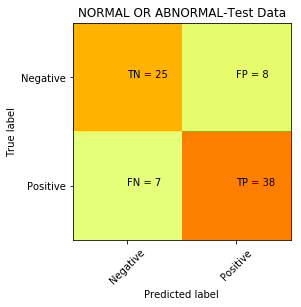

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        33
           1       0.83      0.84      0.84        45

   micro avg       0.81      0.81      0.81        78
   macro avg       0.80      0.80      0.80        78
weighted avg       0.81      0.81      0.81        78



In [33]:
predictions = tree.predict(X_train)
print("Accuracy Score for Train Set:\n")
print(accuracy_score(Y_train, predictions))
plot_conf_matrix(confusion_matrix(Y_train, predictions),'Train Data')
print(classification_report(Y_train, predictions))

predictions = tree.predict(X_test)
print("Accuracy Score for Test Set:\n")
print(accuracy_score(Y_test, predictions))
plot_conf_matrix(confusion_matrix(Y_test, predictions),'Test Data')
print(classification_report(Y_test, predictions))

Text(0, 0.5, 'Feature')

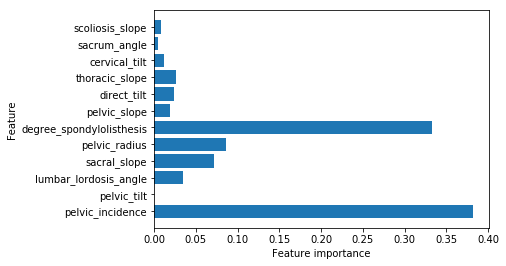

In [34]:
n_features = X_train.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features),['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Class_att'])
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [35]:
#decision tree için randomize seçme aracı

In [32]:
from sklearn.model_selection import RandomizedSearchCV
max_depth=[1,2,3,4,5,6,7,8,9,10,20,30,40,50]
max_features=['auto','sqrt','log2']
random_grid=dict(max_depth=max_depth , max_features= max_features)

gs_log = RandomizedSearchCV(estimator = tree, param_distributions = random_grid, cv = 3, verbose=2, n_jobs = -1)
gs_log.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    1.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.7s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [99]:
gs_log.best_params_

{'max_depth': 7, 'max_features': 'auto'}

In [100]:
#corr_matrix = lbl.corr()
#corr_matrix["Class_att"].sort_values(ascending=False)

In [101]:
#naive bayes

In [35]:
 import numpy as np

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
 clf.fit(X_train, Y_train)
GaussianNB(priors=None, var_smoothing=1e-09)
#print(clf.predict([[0, 1]]))
clf_pf = GaussianNB()
clf_pf.partial_fit(X_test, Y_test, np.unique(Y_test))
GaussianNB(priors=None, var_smoothing=1e-09)
#print(clf_pf.predict([[-0.8, -1]]))

GaussianNB(priors=None, var_smoothing=1e-09)

Gaussian Naive Bayes
Accuracy on training data: 0.8273
Accuracy on testing data: 0.8333


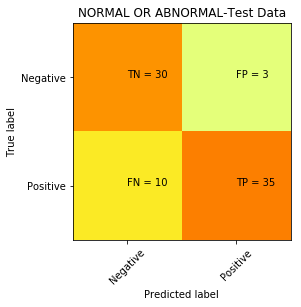

In [36]:

bayes = GaussianNB(
    #priors=[0.25,0.75],
    var_smoothing=1e-9).fit(X_train, Y_train)

print("Gaussian Naive Bayes")
print("Accuracy on training data: {:.4f}".format(bayes.score(X_train, Y_train)))
print("Accuracy on testing data: {:.4f}".format(bayes.score(X_test, Y_test)))

#call function for visulize confusion matrix 
y_predicted = bayes.predict(X_test)
cm = confusion_matrix(Y_test, y_predicted)
plot_conf_matrix(cm,'Test Data')

Accuracy Score for Train Set:

0.8272727272727273


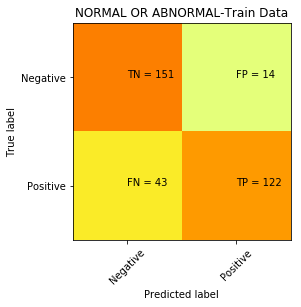

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       165
           1       0.90      0.74      0.81       165

   micro avg       0.83      0.83      0.83       330
   macro avg       0.84      0.83      0.83       330
weighted avg       0.84      0.83      0.83       330

Accuracy Score for Test Set:

0.8333333333333334


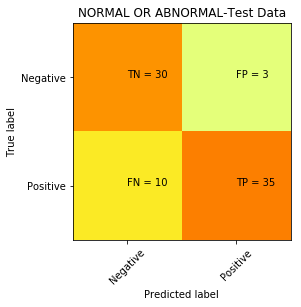

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        33
           1       0.92      0.78      0.84        45

   micro avg       0.83      0.83      0.83        78
   macro avg       0.84      0.84      0.83        78
weighted avg       0.85      0.83      0.83        78



In [37]:
predictions = bayes.predict(X_train)
print("Accuracy Score for Train Set:\n")
print(accuracy_score(Y_train, predictions))
plot_conf_matrix(confusion_matrix(Y_train, predictions),'Train Data')
print(classification_report(Y_train, predictions))

predictions = bayes.predict(X_test)
print("Accuracy Score for Test Set:\n")
print(accuracy_score(Y_test, predictions))
plot_conf_matrix(confusion_matrix(Y_test, predictions),'Test Data')
print(classification_report(Y_test, predictions))

In [223]:
from sklearn.model_selection import RandomizedSearchCV
max_depth=[1,2,3,4,5,6,7,8,9,10,20,30,40,50]
max_features=['auto','sqrt','log2']
random_grid=dict(max_depth=max_depth , max_features= max_features)

gs_log = RandomizedSearchCV(estimator = tree, param_distributions = random_grid, cv = 3, verbose=2, n_jobs = -1)
gs_log.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [106]:
#KNN

In [251]:
#from sklearn.grid_search import GridSearchCV

k_range = range(1, 31)
n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
knn=KNeighborsClassifier()
weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=weight_options)
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

# fit
rand.fit(X_train,Y_train)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

KNN
Accuracy on training data: 0.8788
Accuracy on testing data: 0.6923


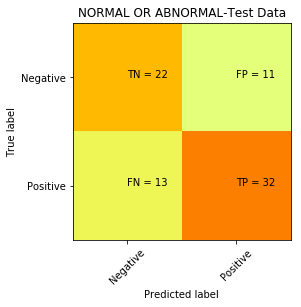

In [45]:

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train,Y_train)

print("KNN")
print("Accuracy on training data: {:.4f}".format(neigh.score(X_train, Y_train)))
print("Accuracy on testing data: {:.4f}".format(neigh.score(X_test, Y_test)))

y_predicted = neigh.predict(X_test)
cm = confusion_matrix(Y_test, y_predicted)
plot_conf_matrix(cm,'Test Data')


Accuracy Score for Train Set:

0.8787878787878788


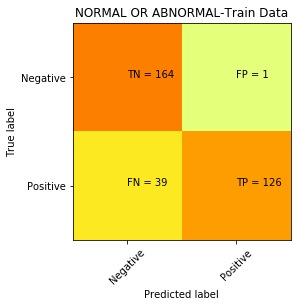

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       165
           1       0.99      0.76      0.86       165

   micro avg       0.88      0.88      0.88       330
   macro avg       0.90      0.88      0.88       330
weighted avg       0.90      0.88      0.88       330

Accuracy Score for Test Set:

0.6923076923076923


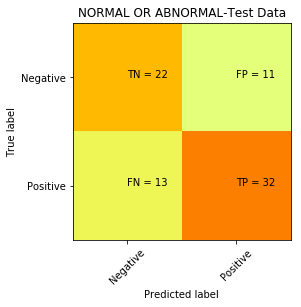

              precision    recall  f1-score   support

           0       0.63      0.67      0.65        33
           1       0.74      0.71      0.73        45

   micro avg       0.69      0.69      0.69        78
   macro avg       0.69      0.69      0.69        78
weighted avg       0.70      0.69      0.69        78



In [46]:
predictions = neigh.predict(X_train)
print("Accuracy Score for Train Set:\n")
print(accuracy_score(Y_train, predictions))
plot_conf_matrix(confusion_matrix(Y_train, predictions),'Train Data')
print(classification_report(Y_train, predictions))

predictions = neigh.predict(X_test)
print("Accuracy Score for Test Set:\n")
print(accuracy_score(Y_test, predictions))
plot_conf_matrix(confusion_matrix(Y_test, predictions),'Test Data')
print(classification_report(Y_test, predictions))

In [40]:
#SGD iptal edildi

Accuracy Score for Train Set:

0.5331125827814569


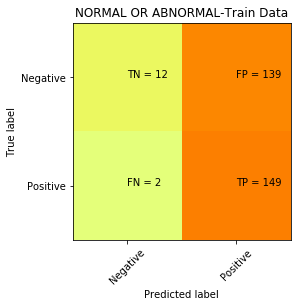

              precision    recall  f1-score   support

           0       0.86      0.08      0.15       151
           1       0.52      0.99      0.68       151

   micro avg       0.53      0.53      0.53       302
   macro avg       0.69      0.53      0.41       302
weighted avg       0.69      0.53      0.41       302

Accuracy Score for Test Set:

0.7011494252873564


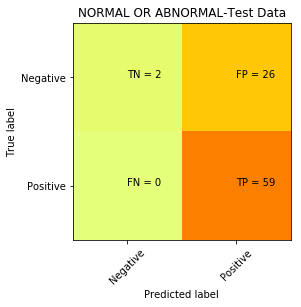

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        28
           1       0.69      1.00      0.82        59

   micro avg       0.70      0.70      0.70        87
   macro avg       0.85      0.54      0.48        87
weighted avg       0.79      0.70      0.60        87



In [111]:
predictions = sgd.predict(X_train)
print("Accuracy Score for Train Set:\n")
print(accuracy_score(Y_train, predictions))
plot_conf_matrix(confusion_matrix(Y_train, predictions),'Train Data')
print(classification_report(Y_train, predictions))

predictions = sgd.predict(X_test)
print("Accuracy Score for Test Set:\n")
print(accuracy_score(Y_test, predictions))
plot_conf_matrix(confusion_matrix(Y_test, predictions),'Test Data')
print(classification_report(Y_test, predictions))

Random Forest Algorithm
Accuracy on training set: 0.9515
Accuracy on test set: 0.8462


c:\users\real\appdata\local\programs\python\python35\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


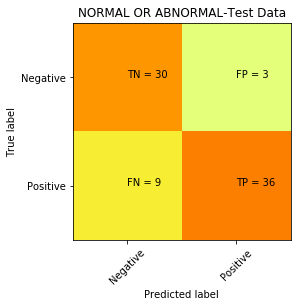

In [50]:


from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics

#Algorithm trains for old dataset
randomclf = RandomForestClassifier( max_depth=6)
randomclf=randomclf.fit(X_train,Y_train)
#Algorithm trains for new dataset

print("Random Forest Algorithm")
print("Accuracy on training set: {:.4f}".format(randomclf.score(X_train,Y_train)))
print("Accuracy on test set: {:.4f}".format(randomclf.score(X_test,Y_test)))

y_predicted = randomclf.predict(X_test)
cm = confusion_matrix(Y_test, y_predicted)
plot_conf_matrix(cm,'Test Data')   

Accuracy Score for Train Set:

0.9515151515151515


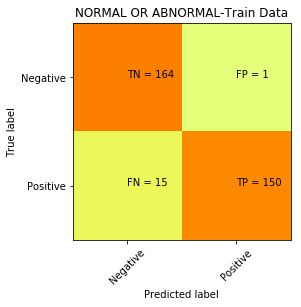

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       165
           1       0.99      0.91      0.95       165

   micro avg       0.95      0.95      0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

Accuracy Score for Test Set:

0.8461538461538461


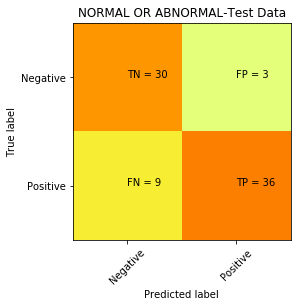

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        33
           1       0.92      0.80      0.86        45

   micro avg       0.85      0.85      0.85        78
   macro avg       0.85      0.85      0.85        78
weighted avg       0.86      0.85      0.85        78



In [51]:
predictions = randomclf.predict(X_train)
print("Accuracy Score for Train Set:\n")
print(accuracy_score(Y_train, predictions))
plot_conf_matrix(confusion_matrix(Y_train, predictions),'Train Data')
print(classification_report(Y_train, predictions))

predictions = randomclf.predict(X_test)
print("Accuracy Score for Test Set:\n")
print(accuracy_score(Y_test, predictions))
plot_conf_matrix(confusion_matrix(Y_test, predictions),'Test Data')
print(classification_report(Y_test, predictions))

ADA BOOSTING
Accuracy on training data: 0.9818
Accuracy on testing data: 0.8333


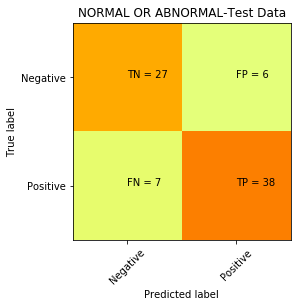

In [52]:
# ADA BOOSTING

from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
#for label in dataset.columns:
#    dataset[label] = LabelEncoder().fit(dataset[label]).transform(dataset[label])
    
#X = lower_back_pain.drop(['target'],axis=1)
#Y = dataset['target']
#model = DecisionTreeClassifier(criterion='entropy',max_depth=1)
#AdaBoost = AdaBoostClassifier(base_estimator= model,n_estimators=400,learning_rate=1)
AdaBoost = AdaBoostClassifier(n_estimators=99,learning_rate=1,algorithm='SAMME')
AdaBoost.fit(X_train,Y_train)



print("ADA BOOSTING")
print("Accuracy on training data: {:.4f}".format(AdaBoost.score(X_train,Y_train)))
print("Accuracy on testing data: {:.4f}".format(AdaBoost.score(X_test,Y_test)))
y_predicted = AdaBoost.predict(X_test)
cm = confusion_matrix(Y_test, y_predicted)
plot_conf_matrix(cm,'Test Data')   

Accuracy Score for Train Set:

0.9818181818181818


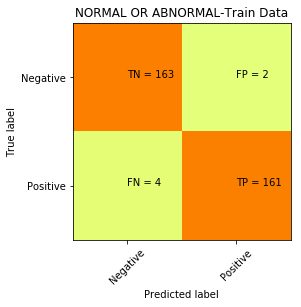

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       165
           1       0.99      0.98      0.98       165

   micro avg       0.98      0.98      0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

Accuracy Score for Test Set:

0.8333333333333334


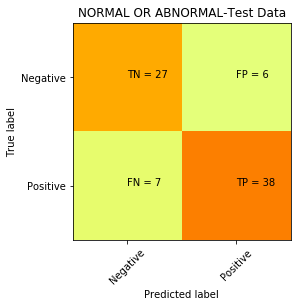

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.86      0.84      0.85        45

   micro avg       0.83      0.83      0.83        78
   macro avg       0.83      0.83      0.83        78
weighted avg       0.83      0.83      0.83        78



In [53]:
predictions = AdaBoost.predict(X_train)
print("Accuracy Score for Train Set:\n")
print(accuracy_score(Y_train, predictions))
plot_conf_matrix(confusion_matrix(Y_train, predictions),'Train Data')
print(classification_report(Y_train, predictions))

predictions = AdaBoost.predict(X_test)
print("Accuracy Score for Test Set:\n")
print(accuracy_score(Y_test, predictions))
plot_conf_matrix(confusion_matrix(Y_test, predictions),'Test Data')
print(classification_report(Y_test, predictions))

In [74]:
#END OF PROJECT